# Lista 5

In [263]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy import signal


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['text.usetex'] = True

# O LMS

$\mathbf{w}(k+1) = \mathbf{w}(k) + 2\mu e(k)\mathbf{x}(k)$

LMS algorithm
    - Inicialization
$\mathbf{x}(0) = \mathbf{w}(0) = [0 0 ... 0]^{T}$
    - Do for k >= 0
1. $e(k) = d(k) - \mathbf{x}^{T}(k)\mathbf{w}(k)$

2. $\mathbf{w}(k+1) = \mathbf{w}(k) + 2\mu e(k)\mathbf{x}(k)$

In [159]:
x

array([[0],
       [0],
       [0]])

In [170]:
w_atual

array([[0.],
       [0.],
       [0.]])

In [187]:
x*w_atual

array([[-0.],
       [ 0.],
       [ 0.]])

In [377]:
def error_plot(error_list, is_db=True):
    
    error_list = np.mean(error_list, axis=0) 
    eps = float(10**-36)
    
    mse = error_list**2
    
    if is_db is True:
        x_plt = 10 * np.log10(mse + eps)
    else:
        x_plt = mse

    plt.plot(range(len(mse)), x_plt)
    plt.ylabel(r'MSE~(dB)')
    plt.xlabel(r'Iteração')
    plt.grid(True)
    plt.show()


### Nesse caso estou considerando que eu acertei exatamente o número de coeficientes do filtro


In [382]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25], [0.25]])



# Número de iterações
n_iteracoes = 2000
# Número de Monte Carlo
n_mc = 100

passo = 0.05
for mc in range(n_mc):
    
    # Inicializações
    erros = np.array([])
    w_atual = np.array([[0], [0], [0]])
    x = np.array([[0], [0], [0]])
    # Ruído com média zero
    ruido = np.random.random(n_iteracoes)
    ruido = ruido - ruido.mean()
    
    for ii in range(n_iteracoes):
        desejado = np.dot(x.T, h) + 0.1*ruido[ii]
        saida = np.dot(x.T, w_atual) 
        erros = np.append(erros, [desejado - saida])
        
        


        # O LMS
        w_prox = w_atual + 2*passo*erros[ii]*x

        # Atualiza o valor dos coeficientes do filtro
        w_atual = w_prox

        #Atualiza o x (shifta o que tem e coloca um valor novo no final)
        x = np.roll(x, shift=-1)
        x = np.append(arr=x[:-1], values=ruido[ii])
        x = np.reshape(x, (len(x), 1))  
    if mc == 0:
        erros_mc = erros
    else:
        erros_mc = np.vstack((erros_mc, erros))
    
        

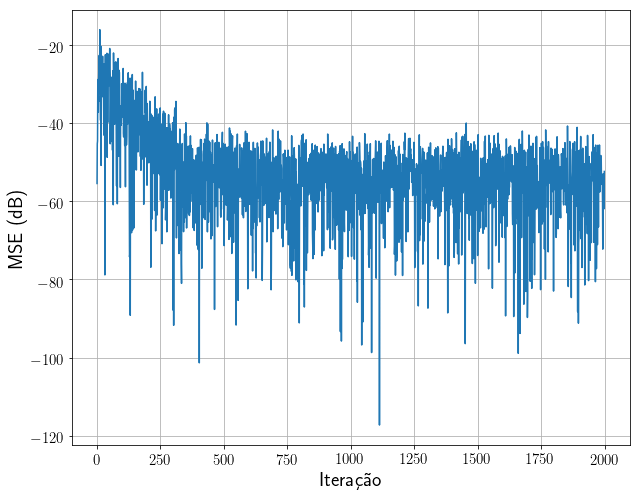

In [383]:
error_plot(erros_mc, is_db=True)

In [384]:
w_prox

array([[-2.00460188],
       [ 0.24633547],
       [ 0.24328723]])

### Submodelado

In [404]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25], [0.25], [0]])



# Número de iterações
n_iteracoes = 100000
# Número de Monte Carlo
n_mc = 1

passo = 0.05
for mc in range(n_mc):
    
    # Inicializações
    erros = np.array([])
    # 3 coef no FA
    w_atual = np.array([[0], [0], [0]])
    x_fa = np.array([[0], [0], [0]])
    
    # 4 coef no H
    x_h = np.array([[0], [0], [0], [0]])
    
    # Ruído com média zero
    ruido = np.random.random(n_iteracoes)
    ruido = ruido - ruido.mean()
    
    for ii in range(n_iteracoes):
        desejado = np.dot(x_h.T, h) #+ 0.1*ruido[ii]
        saida = np.dot(x_fa.T, w_atual) 
        erros = np.append(erros, [desejado - saida])

        # O LMS
        w_prox = w_atual + 2*passo*erros[ii]*x_fa

        # Atualiza o valor dos coeficientes do filtro
        w_atual = w_prox

        #Atualiza o x (shifta o que tem e coloca um valor novo no final)
        x_fa = np.roll(x_fa, shift=-1)
        x_fa = np.append(arr=x_fa[:-1], values=ruido[ii])
        x_fa = np.reshape(x_fa, (len(x_fa), 1))  

        x_h = np.roll(x_h, shift=-1)
        x_h = np.append(arr=x_h[:-1], values=ruido[ii])
        x_h = np.reshape(x_h, (len(x_h), 1))  
    if mc == 0:
        erros_mc = erros
    else:
        erros_mc = np.vstack((erros_mc, erros))
    
        

In [405]:
w_prox

array([[0.24512118],
       [0.3761796 ],
       [0.03654075]])

## Supramodelo

In [406]:
# Sistema que eu quero descobrir
h = np.array([[-2], [0.25], [0.25], [0]])



# Número de iterações
n_iteracoes = 100000
# Número de Monte Carlo
n_mc = 1

passo = 0.05
for mc in range(n_mc):
    
    # Inicializações
    erros = np.array([])
    # 6 coef no FA
    w_atual = np.array([[0], [0], [0], [0], [0], [0]])
    x_fa = np.array([[0], [0], [0], [0], [0], [0]])
    
    # 4 coef no H
    x_h = np.array([[0], [0], [0], [0]])
    
    # Ruído com média zero
    ruido = np.random.random(n_iteracoes)
    ruido = ruido - ruido.mean()
    
    for ii in range(n_iteracoes):
        desejado = np.dot(x_h.T, h) #+ 0.1*ruido[ii]
        saida = np.dot(x_fa.T, w_atual) 
        erros = np.append(erros, [desejado - saida])

        # O LMS
        w_prox = w_atual + 2*passo*erros[ii]*x_fa

        # Atualiza o valor dos coeficientes do filtro
        w_atual = w_prox

        #Atualiza o x (shifta o que tem e coloca um valor novo no final)
        x_fa = np.roll(x_fa, shift=-1)
        x_fa = np.append(arr=x_fa[:-1], values=ruido[ii])
        x_fa = np.reshape(x_fa, (len(x_fa), 1))  

        x_h = np.roll(x_h, shift=-1)
        x_h = np.append(arr=x_h[:-1], values=ruido[ii])
        x_h = np.reshape(x_h, (len(x_h), 1))  
    if mc == 0:
        erros_mc = erros
    else:
        erros_mc = np.vstack((erros_mc, erros))

In [407]:
w_prox

array([[ 1.68118973e-16],
       [-1.44570279e-16],
       [-2.00000000e+00],
       [ 2.50000000e-01],
       [ 2.50000000e-01],
       [-3.20960020e-17]])